In [251]:
import numpy as np
import random

In [255]:
import yfinance as yf
import pandas as pd
SP500 = yf.download(tickers = "^GSPC", start = '2014-11-18',end = '2023-10-14', prepost = True,  progress=False)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-10-25  3799.439941  3862.850098  3799.439941  3859.110107  3859.110107   
2022-10-26  3825.969971  3886.149902  3824.070068  3830.600098  3830.600098   
2022-10-27  3834.689941  3859.949951  3803.790039  3807.300049  3807.300049   
2022-10-28  3808.260010  3905.419922  3808.260010  3901.060059  3901.060059   
2022-10-31  3881.850098  3893.729980  3863.179932  3871.979980  3871.979980   
...                 ...          ...          ...          ...          ...   
2023-10-18  4357.350098  4364.200195  4303.839844  4314.600098  4314.600098   
2023-10-19  4321.359863  4339.540039  4269.689941  4278.000000  4278.000000   
2023-10-20  4273.850098  4276.560059  4223.029785  4224.160156  4224.160156   
2023-10-23  4210.399902  4255.839844  4189.220215  4217.040039  4217.040039   
2023-10-24  4235.790039  4259.379883  4219.430176  4

<AxesSubplot:xlabel='Date'>

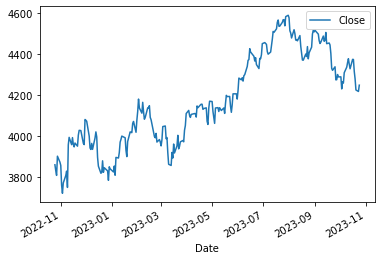

In [256]:
SP500.plot.line(y="Close", use_index=True)

In [257]:
SP500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-25,3799.439941,3862.850098,3799.439941,3859.110107,3859.110107,4843120000
2022-10-26,3825.969971,3886.149902,3824.070068,3830.600098,3830.600098,4817310000
2022-10-27,3834.689941,3859.949951,3803.790039,3807.300049,3807.300049,4687320000
2022-10-28,3808.260010,3905.419922,3808.260010,3901.060059,3901.060059,4459410000
2022-10-31,3881.850098,3893.729980,3863.179932,3871.979980,3871.979980,4820620000


In [260]:
SP500_close = SP500["Close"]
SP500_close

Date
2022-10-25    3859.110107
2022-10-26    3830.600098
2022-10-27    3807.300049
2022-10-28    3901.060059
2022-10-31    3871.979980
                 ...     
2023-10-18    4314.600098
2023-10-19    4278.000000
2023-10-20    4224.160156
2023-10-23    4217.040039
2023-10-24    4247.680176
Name: Close, Length: 251, dtype: float64

In [266]:
returns = []

for i in range(0, len(SP500_close)-1):
    tomorrow = SP500_close[i+1]
    today = SP500_close[i]  
    daily_return = (tomorrow - today)/today
    returns.append(daily_return)
    

mu = np.mean(returns)*250
sigma = np.std(returns)*np.sqrt(250)

print(mu)
print(sigma)

0.1079970897911135
0.15556207744274445


/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_2367/3818696983.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tomorrow = SP500_close[i+1]
/var/folders/9k/ywvf61854_j0k_l2ksy1rrsc0000gn/T/ipykernel_2367/3818696983.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  today = SP500_close[i]


In [274]:
def EMM_model():
    tbegin = 0
    tend = 1
    deltat = .004
    t = np.arange(tbegin, tend, deltat)

    S0 = 4247.680176

    sqrtdt = np.sqrt(deltat)


    prices=[]

    y = S0

    for j in range(0, t.size):
        y = y + y * mu * deltat + y * sigma * random.gauss(0, np.sqrt(deltat))
        prices.append(y)
    return t, prices



    


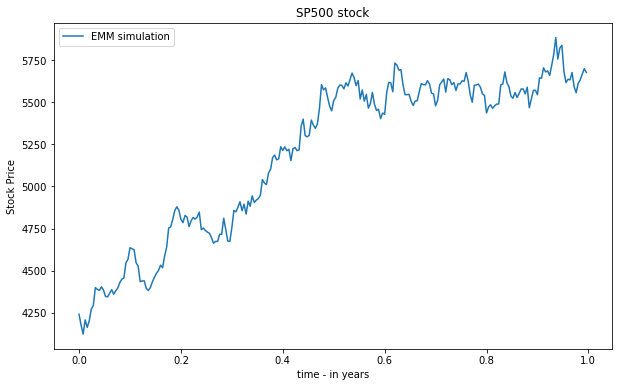

In [277]:
import matplotlib.pyplot as plt
num_sims=1
plt.figure(figsize=(10, 6))

plt.plot(*EMM_model(), label = "EMM simulation")


plt.xlabel("time - in years")
plt.ylabel("Stock Price")
plt.title('SP500 stock - prediction')

# Add a legend
plt.legend()

plt.show()

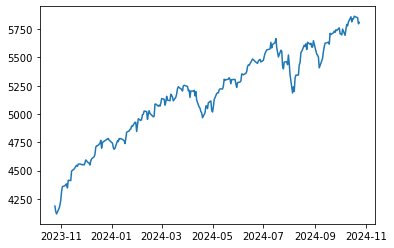

In [282]:
SP500_actual = yf.download(tickers = "^GSPC", start = '2023-10-25',end = '2024-10-25', prepost = True,  progress=False)
plt.plot(SP500_actual["Close"])



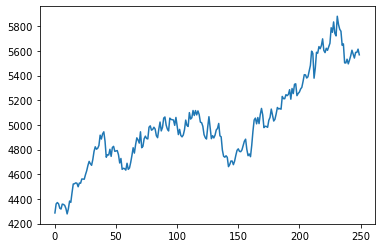

In [283]:
plt.plot(prices)

In [284]:
SP500_actual.to_csv("Sp500_actual.csv")

In [287]:
df = pd.DataFrame(prices)
df.to_csv("SP500_sim.csv")